In [2]:
library(ANCOMBC)
library(qiime2R)
library(tidyr)
library(tibble)
library(ggplot2)
library(microbiome)
library(phyloseq)
library("tidyverse")
library("dplyr")

In [252]:
# Read in the 16S qza files and clean them up for phyloseq
ASVs <- read_qza("/Users/stephanie.rosales/Documents/omics_projects/Resitada/qiime_output/table-BacArc_resistada.qza")
ASVs <- ASVs$data # Extract the count data from list
taxa_16S <- read_qza("/Users/stephanie.rosales/Documents/omics_projects/Resitada/qiime_output/taxonomy_resistada.qza")
taxa_16S <- taxa_16S$data %>% as_tibble() %>% separate(Taxon, sep=";",
c("Kingdom", "Phylum", "Class", "Order", "Family", "Genus", "Species")) %>% 
# Convert taxonomy info to data frame with correct taxonomy labels
#taxa <- taxa_16S[-1,]
select(-Confidence) %>% arrange(Feature.ID) %>% mutate(ASV = 1:n()) %>% 
mutate(newcol = "ASV") %>%
unite("ASVs", newcol:ASV)
#asv_tab$asv_id <- rownames(asv_tab) # add a new column for ids
tree_file <-read_qza("/Users/stephanie.rosales/Documents/omics_projects/Resitada/qiime_output/rooted-BacArc_resistada.qza")$data

Warning message:
“Expected 7 pieces. Missing pieces filled with `NA` in 5374 rows [3, 6, 9, 11, 12, 14, 15, 16, 17, 18, 22, 23, 27, 31, 36, 38, 42, 45, 49, 51, ...].”


In [254]:
meta = read.csv("/Users/stephanie.rosales/Documents/omics_projects/Resitada/metadata_RESISTADA.csv", header = T, row.names = 1,
na.strings = c("", "NA"))

meta$Survivorship <- factor(meta$Survivorship , 
    levels = c("Susceptible", "Resistant", "NA"))

In [255]:
ps= phyloseq(otu_table(ASVs, taxa_are_rows= T),
tax_table(as.data.frame(taxa_16S) %>% column_to_rownames("Feature.ID") %>%
as.matrix()), sample_data(meta), tree_file)
ps

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 9710 taxa and 280 samples ]
sample_data() Sample Data:       [ 280 samples by 41 sample variables ]
tax_table()   Taxonomy Table:    [ 9710 taxa by 8 taxonomic ranks ]
phy_tree()    Phylogenetic Tree: [ 9710 tips and 8540 internal nodes ]

In [256]:
dups = c("N169_256_R2", "N157_265_R2", "N165_296_R2", "N161_A067_R2", "N185_A088_R2",
                                 "N164_A089_R2","N119_A107","N267_A110","N7_A114", "N156_A115","N158_A116",
                                 "N101_A118","N160_A119","N277_A125")

ps = subset_samples(ps, !ID %in% dups & Genotype!="U41" )
ps






phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 9710 taxa and 257 samples ]
sample_data() Sample Data:       [ 257 samples by 41 sample variables ]
tax_table()   Taxonomy Table:    [ 9710 taxa by 8 taxonomic ranks ]
phy_tree()    Phylogenetic Tree: [ 9710 tips and 8540 internal nodes ]

In [257]:
ps_razor =subset_samples(ps, Type=="Razor")
ps_razor

ps_razor_nr =subset_taxa(ps_razor, Genus!="g__MD3-55" )
ps_razor_nr

ps_Clipped =subset_samples(ps, Type=="Clipped")
ps_Clipped


ps_clip_nr =subset_taxa(ps_Clipped, Genus!="g__MD3-55" )
ps_clip_nr

ps_neg =subset_samples(ps, Type=="Neg")
ps_neg


ps_paired = subset_samples(ps_Clipped, Pairs=="paired")
ps_paired

ps_paired_DL = subset_samples(ps_Clipped, Pairs=="paired" | Health=="DL")
ps_paired_DL

ps_homo_paired_DL =subset_samples(ps, Health=="DL" & Diseased=="Pathogen")
ps_homo_paired_DL

ps_unpaired =subset_samples(ps_Clipped, Pairs=="unpaired")
ps_unpaired


ps_unpaired =subset_samples(ps_Clipped, Pairs=="unpaired")
ps_unpaired


ps_Am_Pl_c =subset_samples(ps_paired, Combo=="Ambient_Placebo")
ps_Am_Pl_c

ps_Am_Pa_c =subset_samples(ps_paired, Combo=="Ambient_Pathogen")
ps_Am_Pa_c

ps_NH_Pl_c =subset_samples(ps_paired, Combo=="NH4_Placebo")
ps_NH_Pl_c

ps_NH_Pa_c =subset_samples(ps_paired, Combo=="NH4_Pathogen")
ps_NH_Pa_c

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 9710 taxa and 60 samples ]
sample_data() Sample Data:       [ 60 samples by 41 sample variables ]
tax_table()   Taxonomy Table:    [ 9710 taxa by 8 taxonomic ranks ]
phy_tree()    Phylogenetic Tree: [ 9710 tips and 8540 internal nodes ]

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 7725 taxa and 60 samples ]
sample_data() Sample Data:       [ 60 samples by 41 sample variables ]
tax_table()   Taxonomy Table:    [ 7725 taxa by 8 taxonomic ranks ]
phy_tree()    Phylogenetic Tree: [ 7725 tips and 6818 internal nodes ]

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 9710 taxa and 192 samples ]
sample_data() Sample Data:       [ 192 samples by 41 sample variables ]
tax_table()   Taxonomy Table:    [ 9710 taxa by 8 taxonomic ranks ]
phy_tree()    Phylogenetic Tree: [ 9710 tips and 8540 internal nodes ]

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 7725 taxa and 192 samples ]
sample_data() Sample Data:       [ 192 samples by 41 sample variables ]
tax_table()   Taxonomy Table:    [ 7725 taxa by 8 taxonomic ranks ]
phy_tree()    Phylogenetic Tree: [ 7725 tips and 6818 internal nodes ]

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 9710 taxa and 5 samples ]
sample_data() Sample Data:       [ 5 samples by 41 sample variables ]
tax_table()   Taxonomy Table:    [ 9710 taxa by 8 taxonomic ranks ]
phy_tree()    Phylogenetic Tree: [ 9710 tips and 8540 internal nodes ]

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 9710 taxa and 126 samples ]
sample_data() Sample Data:       [ 126 samples by 41 sample variables ]
tax_table()   Taxonomy Table:    [ 9710 taxa by 8 taxonomic ranks ]
phy_tree()    Phylogenetic Tree: [ 9710 tips and 8540 internal nodes ]

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 9710 taxa and 127 samples ]
sample_data() Sample Data:       [ 127 samples by 41 sample variables ]
tax_table()   Taxonomy Table:    [ 9710 taxa by 8 taxonomic ranks ]
phy_tree()    Phylogenetic Tree: [ 9710 tips and 8540 internal nodes ]

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 9710 taxa and 54 samples ]
sample_data() Sample Data:       [ 54 samples by 41 sample variables ]
tax_table()   Taxonomy Table:    [ 9710 taxa by 8 taxonomic ranks ]
phy_tree()    Phylogenetic Tree: [ 9710 tips and 8540 internal nodes ]

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 9710 taxa and 66 samples ]
sample_data() Sample Data:       [ 66 samples by 41 sample variables ]
tax_table()   Taxonomy Table:    [ 9710 taxa by 8 taxonomic ranks ]
phy_tree()    Phylogenetic Tree: [ 9710 tips and 8540 internal nodes ]

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 9710 taxa and 66 samples ]
sample_data() Sample Data:       [ 66 samples by 41 sample variables ]
tax_table()   Taxonomy Table:    [ 9710 taxa by 8 taxonomic ranks ]
phy_tree()    Phylogenetic Tree: [ 9710 tips and 8540 internal nodes ]

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 9710 taxa and 34 samples ]
sample_data() Sample Data:       [ 34 samples by 41 sample variables ]
tax_table()   Taxonomy Table:    [ 9710 taxa by 8 taxonomic ranks ]
phy_tree()    Phylogenetic Tree: [ 9710 tips and 8540 internal nodes ]

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 9710 taxa and 23 samples ]
sample_data() Sample Data:       [ 23 samples by 41 sample variables ]
tax_table()   Taxonomy Table:    [ 9710 taxa by 8 taxonomic ranks ]
phy_tree()    Phylogenetic Tree: [ 9710 tips and 8540 internal nodes ]

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 9710 taxa and 39 samples ]
sample_data() Sample Data:       [ 39 samples by 41 sample variables ]
tax_table()   Taxonomy Table:    [ 9710 taxa by 8 taxonomic ranks ]
phy_tree()    Phylogenetic Tree: [ 9710 tips and 8540 internal nodes ]

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 9710 taxa and 30 samples ]
sample_data() Sample Data:       [ 30 samples by 41 sample variables ]
tax_table()   Taxonomy Table:    [ 9710 taxa by 8 taxonomic ranks ]
phy_tree()    Phylogenetic Tree: [ 9710 tips and 8540 internal nodes ]

In [258]:
ps_fill_razor = filter_taxa(ps_razor, function(x) sum(x > 10) > (0.015*length(x)), TRUE)
ps_fill_razor 
                            
ps_fill_razor_nr = filter_taxa(ps_razor_nr, function(x) sum(x > 5) > (0.01*length(x)), TRUE)
ps_fill_razor_nr                          

ps_fill_clip = filter_taxa(ps_Clipped, function(x) sum(x > 5) > (0.01*length(x)), TRUE)
ps_fill_clip
                           
ps_fill_clip_nr = filter_taxa(ps_clip_nr, function(x) sum(x > 5) > (0.001*length(x)), TRUE)
ps_fill_clip_nr                           

ps_fill_neg = filter_taxa(ps_neg, function(x) sum(x > 0) > (0.00*length(x)), TRUE)
ps_fill_neg                         


#ps_fill_cells = filter_taxa(ps_cells, function(x) sum(x > 0) > (0.00*length(x)), TRUE)
#ps_fill_cells
   
                                                      
ps_fill_pair = filter_taxa(ps_paired, function(x) sum(x > 10) > (0.015*length(x)), TRUE)
ps_fill_pair  
                           
ps_fill_unpair = filter_taxa(ps_unpaired, function(x) sum(x > 5) > (0.01*length(x)), TRUE)
ps_fill_unpair 
                             
                             
                             
ps_fill_Am_Pl = filter_taxa(ps_Am_Pl_c, function(x) sum(x > 20 ) > (0.015*length(x)), TRUE)
ps_fill_Am_Pl    

ps_fill_Am_Pa = filter_taxa(ps_Am_Pa_c, function(x) sum(x > 10 ) > (0.015*length(x)), TRUE)
ps_fill_Am_Pa   
                             
ps_fill_NH_Pl = filter_taxa(ps_NH_Pl_c, function(x) sum(x > 20 ) > (0.015*length(x)), TRUE)
ps_fill_NH_Pl    

ps_fill_NH_Pa = filter_taxa(ps_NH_Pa_c, function(x) sum(x > 20 ) > (0.015*length(x)), TRUE)
ps_fill_NH_Pa   
                            
                            

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 840 taxa and 60 samples ]
sample_data() Sample Data:       [ 60 samples by 41 sample variables ]
tax_table()   Taxonomy Table:    [ 840 taxa by 8 taxonomic ranks ]
phy_tree()    Phylogenetic Tree: [ 840 tips and 762 internal nodes ]

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 753 taxa and 60 samples ]
sample_data() Sample Data:       [ 60 samples by 41 sample variables ]
tax_table()   Taxonomy Table:    [ 753 taxa by 8 taxonomic ranks ]
phy_tree()    Phylogenetic Tree: [ 753 tips and 710 internal nodes ]

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 1913 taxa and 192 samples ]
sample_data() Sample Data:       [ 192 samples by 41 sample variables ]
tax_table()   Taxonomy Table:    [ 1913 taxa by 8 taxonomic ranks ]
phy_tree()    Phylogenetic Tree: [ 1913 tips and 1604 internal nodes ]

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 5521 taxa and 192 samples ]
sample_data() Sample Data:       [ 192 samples by 41 sample variables ]
tax_table()   Taxonomy Table:    [ 5521 taxa by 8 taxonomic ranks ]
phy_tree()    Phylogenetic Tree: [ 5521 tips and 4881 internal nodes ]

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 245 taxa and 5 samples ]
sample_data() Sample Data:       [ 5 samples by 41 sample variables ]
tax_table()   Taxonomy Table:    [ 245 taxa by 8 taxonomic ranks ]
phy_tree()    Phylogenetic Tree: [ 245 tips and 220 internal nodes ]

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 1521 taxa and 126 samples ]
sample_data() Sample Data:       [ 126 samples by 41 sample variables ]
tax_table()   Taxonomy Table:    [ 1521 taxa by 8 taxonomic ranks ]
phy_tree()    Phylogenetic Tree: [ 1521 tips and 1281 internal nodes ]

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 1872 taxa and 66 samples ]
sample_data() Sample Data:       [ 66 samples by 41 sample variables ]
tax_table()   Taxonomy Table:    [ 1872 taxa by 8 taxonomic ranks ]
phy_tree()    Phylogenetic Tree: [ 1872 tips and 1745 internal nodes ]

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 1369 taxa and 34 samples ]
sample_data() Sample Data:       [ 34 samples by 41 sample variables ]
tax_table()   Taxonomy Table:    [ 1369 taxa by 8 taxonomic ranks ]
phy_tree()    Phylogenetic Tree: [ 1369 tips and 1278 internal nodes ]

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 1537 taxa and 23 samples ]
sample_data() Sample Data:       [ 23 samples by 41 sample variables ]
tax_table()   Taxonomy Table:    [ 1537 taxa by 8 taxonomic ranks ]
phy_tree()    Phylogenetic Tree: [ 1537 tips and 1369 internal nodes ]

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 1349 taxa and 39 samples ]
sample_data() Sample Data:       [ 39 samples by 41 sample variables ]
tax_table()   Taxonomy Table:    [ 1349 taxa by 8 taxonomic ranks ]
phy_tree()    Phylogenetic Tree: [ 1349 tips and 1226 internal nodes ]

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 1848 taxa and 30 samples ]
sample_data() Sample Data:       [ 30 samples by 41 sample variables ]
tax_table()   Taxonomy Table:    [ 1848 taxa by 8 taxonomic ranks ]
phy_tree()    Phylogenetic Tree: [ 1848 tips and 1629 internal nodes ]

In [309]:
ps_clr_df=as.data.frame(otu_table(ps_fill_Am_Pa))
ps_clr_df_meta=as.data.frame(sample_data(ps_fill_Am_Pa))

In [323]:
multi.tests <- function(fun = ancombc, df, vars, group.var, ...) {
    sapply(simplify = FALSE,                                    # sapply(simplify=T) better, elements named
           vars,                                                # loop on vector of outcome variable names
           function(var) {
               formula <- as.formula(paste(var, "~", group.var))# create a formula with outcome and grouping var.
               fun(data = df, formula, ...)                     # perform test with a given fun, default t.test
           }
           )
}

In [316]:
t.test(ps_clr_df_meta$NH4_Susceptibility ~ ps_clr_df_meta$surv)

ERROR: Error in t.test.formula(ps_clr_df_meta$NH4_Susceptibility ~ ps_clr_df_meta$surv): grouping factor must have exactly 2 levels


In [313]:
lapply(ps_clr_df_meta[,c("NH4_Susceptibility", "Disease_Susceptibility")],
       function(x) t.test(x ~ ps_clr_df_meta$surv))

ERROR: Error in t.test.formula(x ~ ps_clr_df_meta$surv): grouping factor must have exactly 2 levels


In [322]:
lapply(ps_clr_df_meta[,c("NH4_Susceptibility", "Disease_Susceptibility")],
       function(x) ancombc(phyloseq = ps_clip_nr, formula = "NH4_Susceptibility"
                           , 
              p_adj_method = "holm", zero_cut = 0.90, lib_cut = 1000, 
              group = "NH4_Susceptibility", struc_zero = TRUE, neg_lb = TRUE, tol = 1e-5, 
              max_iter = 100, conserve = TRUE, alpha = 0.05, global = FALSE))

Warning message in data_prep(phyloseq, group, zero_cut, lib_cut, global = global):
“The multi-group comparison will be deactivated as the group variable has < 3 categories.”
Warning message in data_prep(phyloseq, group, zero_cut, lib_cut, global = global):
“The multi-group comparison will be deactivated as the group variable has < 3 categories.”


,N10-A019,N11-A153,N115-247,N12-A008,N13-A038,N14-A040,N15-A017,N16-A076,N17-A002,N211-A191,⋯,N90-A039,N91-A041,N92-A007,N93-A121,N94-A091,N95-215,N96-231,N97-205,N98-253,N99-A036
ce80d12fb367ffe011c2fb15bf9659bc,0,0,76,0,0,0,0,0,0,0,⋯,0,0,179,86,0,0,0,96,169,94
28fe0a00a6f5e062fba134618cc458e1,0,0,0,0,0,0,0,0,0,0,⋯,0,0,227,105,0,0,0,0,159,0
e23bbf8f65f14f451c2071e477ed2b58,0,0,104,0,0,0,0,0,0,0,⋯,0,125,0,105,0,0,28,0,0,77
58a75ecc587c36de8b4bbbac0c6efff2,0,0,112,154,0,0,0,0,0,0,⋯,0,0,161,111,0,0,0,116,0,100
8c4250b2fdfdd56db618eac4b7569d2d,0,0,80,0,0,0,109,0,57,0,⋯,0,0,0,100,0,0,0,95,0,72
761f540ee829313961a42bdce8e5f36e,0,0,79,0,0,0,0,0,0,0,⋯,0,0,75,121,0,0,0,0,235,71
13d2261e19adef516069e6d4fb5cbbd8,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,74,0,0,0,32,0,51
ea14aa41fbcf1e8af5908e975da064b8,0,0,84,0,0,0,0,0,0,0,⋯,92,0,0,102,0,0,0,0,0,63
ac6820155a85d9cc15f8f62406e10e42,0,0,94,0,0,0,0,0,0,0,⋯,0,0,262,160,0,0,0,211,206,88
a5997412dbc7bdf31e2f533103884dbe,0,0,75,0,0,0,0,0,0,0,⋯,0,0,0,85,0,0,0,0,0,60


In [281]:
out = ancombc(phyloseq = ps_clip_nr, formula = "Combo + Health", 
              p_adj_method = "holm", zero_cut = 0.90, lib_cut = 1000, 
              group = "Health", struc_zero = TRUE, neg_lb = TRUE, tol = 1e-5, 
              max_iter = 100, conserve = TRUE, alpha = 0.05, global = FALSE)

res = out$res
res_global = out$res_global


res = out$res
res_global = out$res_global

df_fig1 = data.frame(res$beta * res$diff_abn, check.names = FALSE) %>% 
  rownames_to_column("taxon_id")

head(df_fig1)

dim(df_fig1)

df_fig2 = data.frame(res$se * res$diff_abn, check.names = FALSE) %>% 
  rownames_to_column("taxon_id")
colnames(df_fig2)[-1] = paste0(colnames(df_fig2)[-1], "SD")
head(df_fig2)


df_fig = df_fig1 %>% left_join(df_fig2, by = "taxon_id") %>%
  transmute(taxon_id, ComboNH4_Pathogen, ComboNH4_Pathogen)%>%
  mutate(group = ifelse(HealthDL > 0, "NH4_Pathogen", "Ambient_Placebo"))
df_fig$taxon_id = factor(df_fig$taxon_id, levels = df_fig$taxon_id)


sigs=res$diff_abn %>% as.data.frame() %>%
select(ComboNH4_Pathogen)  %>%
filter(ComboNH4_Pathogen=="TRUE") %>%
rownames_to_column("taxon_id") %>%
rename(Sig=ComboNH4_Pathogen)
head(sigs)


df_fig =df_fig %>% inner_join(sigs)




ggplot(data = df_fig, 
           aes(x = HealthDL, y = taxon_id, fill = group, color = group)) + 
  geom_bar(stat = "identity", width = 0.7, 
           position = position_dodge(width = 0.4)) +
  geom_errorbar(aes(xmin = HealthDL - HealthDLSD, xmax = HealthDL + HealthDLSD),
                width = 0.2,
                position = position_dodge(0.05), color = "black") + 
  labs(y = NULL, x = "Log fold change") + 
  theme_bw() + 
  theme(legend.position = "none",
        panel.grid.minor.x = element_blank()) +
theme(axis.text.y = element_text(size = 5))


Warning message in data_prep(phyloseq, group, zero_cut, lib_cut, global = global):
“The multi-group comparison will be deactivated as the group variable has < 3 categories.”


,taxon_id,ComboAmbient_Placebo,ComboNH4_Pathogen,ComboNH4_Placebo,HealthDL
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>
1,ce80d12fb367ffe011c2fb15bf9659bc,0,0,0,0
2,28fe0a00a6f5e062fba134618cc458e1,0,0,0,0
3,e23bbf8f65f14f451c2071e477ed2b58,0,0,0,0
4,58a75ecc587c36de8b4bbbac0c6efff2,0,0,0,0
5,8c4250b2fdfdd56db618eac4b7569d2d,0,0,0,0
6,761f540ee829313961a42bdce8e5f36e,0,0,0,0


[1] 80  5

,taxon_id,ComboAmbient_PlaceboSD,ComboNH4_PathogenSD,ComboNH4_PlaceboSD,HealthDLSD
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>
1,ce80d12fb367ffe011c2fb15bf9659bc,0,0,0,0
2,28fe0a00a6f5e062fba134618cc458e1,0,0,0,0
3,e23bbf8f65f14f451c2071e477ed2b58,0,0,0,0
4,58a75ecc587c36de8b4bbbac0c6efff2,0,0,0,0
5,8c4250b2fdfdd56db618eac4b7569d2d,0,0,0,0
6,761f540ee829313961a42bdce8e5f36e,0,0,0,0


ERROR: Error: Problem with `mutate()` column `group`.
[34mℹ[39m `group = ifelse(HealthDL > 0, "NH4_Pathogen", "Ambient_Placebo")`.
[31m✖[39m object 'HealthDL' not found


,taxon_id,HealthDL,NutrientsNH4,GenotypeCooper-9,GenotypeElkhorn,GenotypeFM14,GenotypeFM19,GenotypeFM6,GenotypeFM9,GenotypeK2,GenotypeKelsey-1,GenotypeU44
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,ce80d12fb367ffe011c2fb15bf9659bc,0,0,0,0,0,0,0,0,0,0,0.000000
2,28fe0a00a6f5e062fba134618cc458e1,0,0,0,0,0,0,0,0,0,0,0.000000
3,e23bbf8f65f14f451c2071e477ed2b58,0,0,0,0,0,0,0,0,0,0,0.000000
4,58a75ecc587c36de8b4bbbac0c6efff2,0,0,0,0,0,0,0,0,0,0,2.318446
5,8c4250b2fdfdd56db618eac4b7569d2d,0,0,0,0,0,0,0,0,0,0,0.000000
6,761f540ee829313961a42bdce8e5f36e,0,0,0,0,0,0,0,0,0,0,2.361777


[1] 80 12

,taxon_id,HealthDLSD,NutrientsNH4SD,GenotypeCooper-9SD,GenotypeElkhornSD,GenotypeFM14SD,GenotypeFM19SD,GenotypeFM6SD,GenotypeFM9SD,GenotypeK2SD,GenotypeKelsey-1SD,GenotypeU44SD
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,ce80d12fb367ffe011c2fb15bf9659bc,0,0,0,0,0,0,0,0,0,0,0.0000000
2,28fe0a00a6f5e062fba134618cc458e1,0,0,0,0,0,0,0,0,0,0,0.0000000
3,e23bbf8f65f14f451c2071e477ed2b58,0,0,0,0,0,0,0,0,0,0,0.0000000
4,58a75ecc587c36de8b4bbbac0c6efff2,0,0,0,0,0,0,0,0,0,0,0.6343758
5,8c4250b2fdfdd56db618eac4b7569d2d,0,0,0,0,0,0,0,0,0,0,0.0000000
6,761f540ee829313961a42bdce8e5f36e,0,0,0,0,0,0,0,0,0,0,0.6012047


,taxon_id,Sig
,<chr>,<lgl>
1,a3c29bcb6997cfe572a474e58291af1d,TRUE
2,33f3e0548486f538415267830b2cf493,TRUE
3,b5a357aca74c0d00b3adcc24fa98c9dd,TRUE
4,e0a2968ff8d9c00d66a94dcaabcce29e,TRUE
5,675d52cdcc82a808d1be849a3f6a28dd,TRUE
6,fbf223bb93699d402bbd29e8af110807,TRUE


Joining, by = "taxon_id"

ERROR while rich displaying an object: Error in tapply(X = X, INDEX = x, FUN = FUN, ...): arguments must have same length

Traceback:
1. FUN(X[[i]], ...)
2. tryCatch(withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler), error = outer_handler)
3. tryCatchList(expr, classes, parentenv, handlers)
4. tryCatchOne(expr, names, parentenv, handlers[[1L]])
5. doTryCatch(return(expr), name, parentenv, handler)
6. withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler)
7. repr::mim

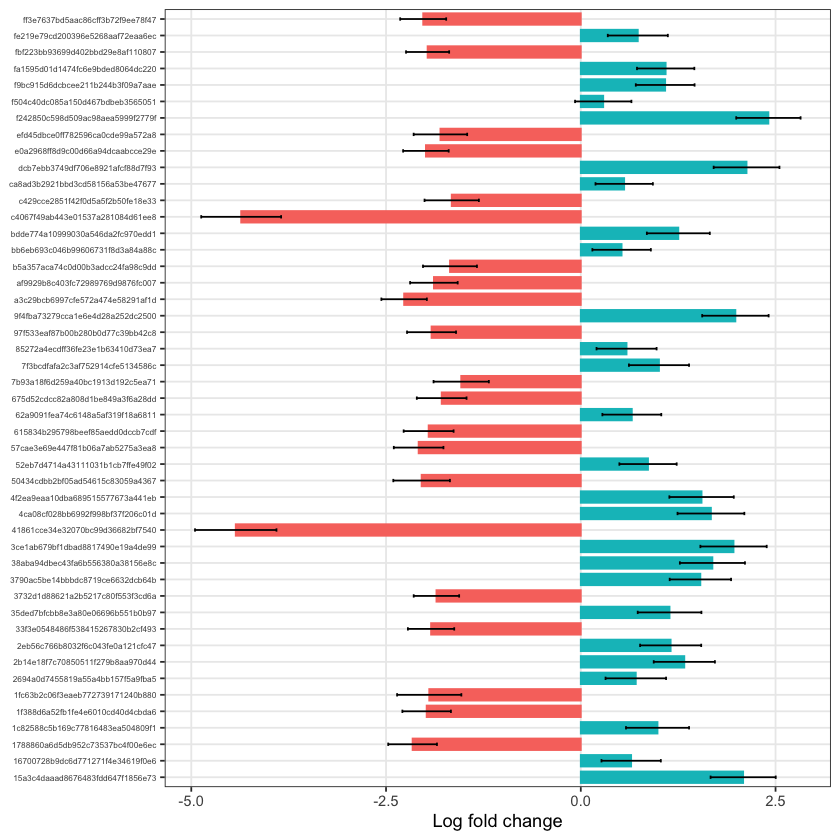

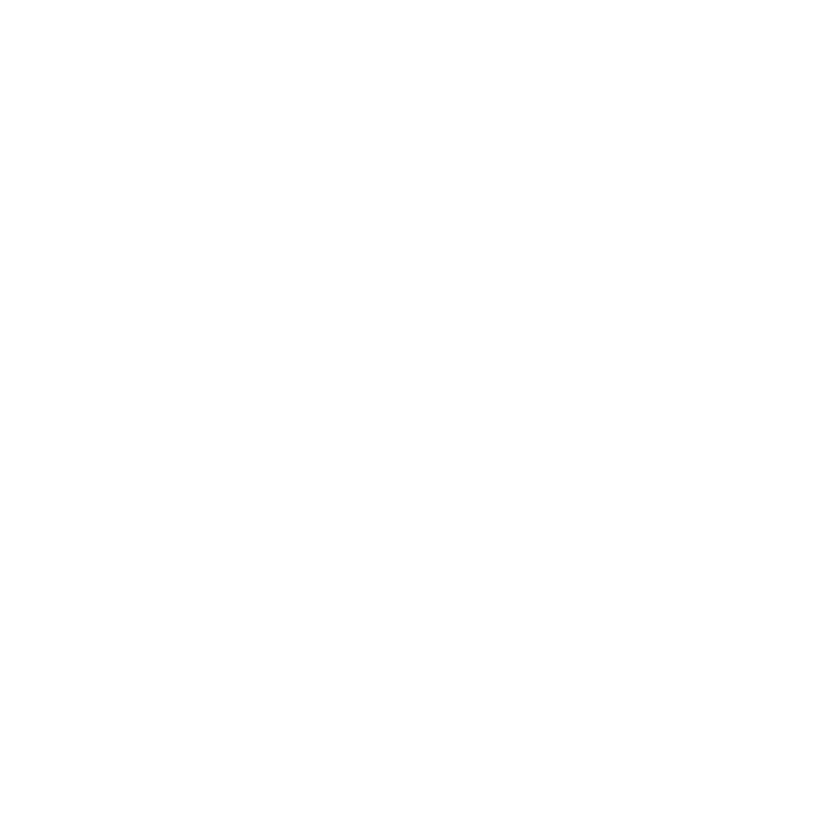

In [274]:
df_fig1 = data.frame(res$beta * res$diff_abn, check.names = FALSE) %>% 
  rownames_to_column("taxon_id")

head(df_fig1)

dim(df_fig1)

df_fig2 = data.frame(res$se * res$diff_abn, check.names = FALSE) %>% 
  rownames_to_column("taxon_id")
colnames(df_fig2)[-1] = paste0(colnames(df_fig2)[-1], "SD")
head(df_fig2)


df_fig = df_fig1 %>% left_join(df_fig2, by = "taxon_id") %>%
  transmute(taxon_id, HealthDL, HealthDLSD)%>%
  mutate(group = ifelse(HealthDL > 0, "DL", "AH"))
df_fig$taxon_id = factor(df_fig$taxon_id, levels = df_fig$taxon_id)


sigs=res$diff_abn %>% as.data.frame() %>%
select(HealthDL)  %>%
filter(HealthDL=="TRUE") %>%
rownames_to_column("taxon_id") %>%
rename(Sig=HealthDL)
head(sigs)


df_fig =df_fig %>% inner_join(sigs)




ggplot(data = df_fig, 
           aes(x = HealthDL, y = taxon_id, fill = group, color = group)) + 
  geom_bar(stat = "identity", width = 0.7, 
           position = position_dodge(width = 0.4)) +
  geom_errorbar(aes(xmin = HealthDL - HealthDLSD, xmax = HealthDL + HealthDLSD),
                width = 0.2,
                position = position_dodge(0.05), color = "black") + 
  labs(y = NULL, x = "Log fold change") + 
  theme_bw() + 
  theme(legend.position = "none",
        panel.grid.minor.x = element_blank()) +
theme(axis.text.y = element_text(size = 5))


df_fig %>%


ggplot(
           aes(x = HealthDL, y = reorder(ASVs, -HealthDL), fill =Order)) + 
  geom_bar(stat = "identity", width = 0.7, 
           position = position_dodge(width = 0.4)) +
  geom_errorbar(aes(xmin = as.numeric(HealthDL) - as.numeric(HealthDLSD), 
xmax = as.numeric(HealthDL) + as.numeric(HealthDLSD)),
               width = 0.2,
               position = position_dodge(0.05), color = "black") + 
  labs(y = NULL, x = "Log fold change") + 
  theme_bw() + 
  theme(
      #legend.position = "none",
        panel.grid.minor.x = element_blank()) +
theme(axis.text.y = element_text(size = 5)) 
#facet_wrap(Genotype~., scales = "free_x") 

In [261]:
res_ancom= df_fig %>%
mutate(Feature.ID = taxon_id) %>%
#rownames_to_column("taxon")
left_join(as.data.frame(taxa_16S), "Feature.ID") %>%
#select(taxon_id, Class, Order, Family, Genus, Taxon) %>%
column_to_rownames("taxon_id")%>%
as.matrix

In [262]:
ps2=phyloseq(otu_table(ASVs, taxa_are_rows=TRUE), 
               sample_data(meta),
              tax_table(res_ancom))


In [263]:
ps2=subset_samples(ps2, !ID %in% c("N169_256_R2", "N157_265_R2", "N165_296_R2", "N161_A067_R2", "N185_A088_R2",
                                 "N164_A089_R2","N119_A107","N267_A110","N7_A114", "N156_A115","N158_A116",
                                 "N101_A118","N160_A119","N277_A125"))
ps2= subset_samples(ps2, Genotype!="U41")
ps2

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 47 taxa and 257 samples ]
sample_data() Sample Data:       [ 257 samples by 41 sample variables ]
tax_table()   Taxonomy Table:    [ 47 taxa by 13 taxonomic ranks ]

In [264]:
ps2_paired = subset_samples(ps2, Type=="Clipped")
ps2_paired

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 47 taxa and 192 samples ]
sample_data() Sample Data:       [ 192 samples by 41 sample variables ]
tax_table()   Taxonomy Table:    [ 47 taxa by 13 taxonomic ranks ]

In [270]:
psr_fill_melt = ps2_paired  %>%  
  #tax_glom("Order") %>% 
  transform_sample_counts(function(x) {x/sum(x)} ) %>% # Transform to rel. abundance
  psmelt()     
   

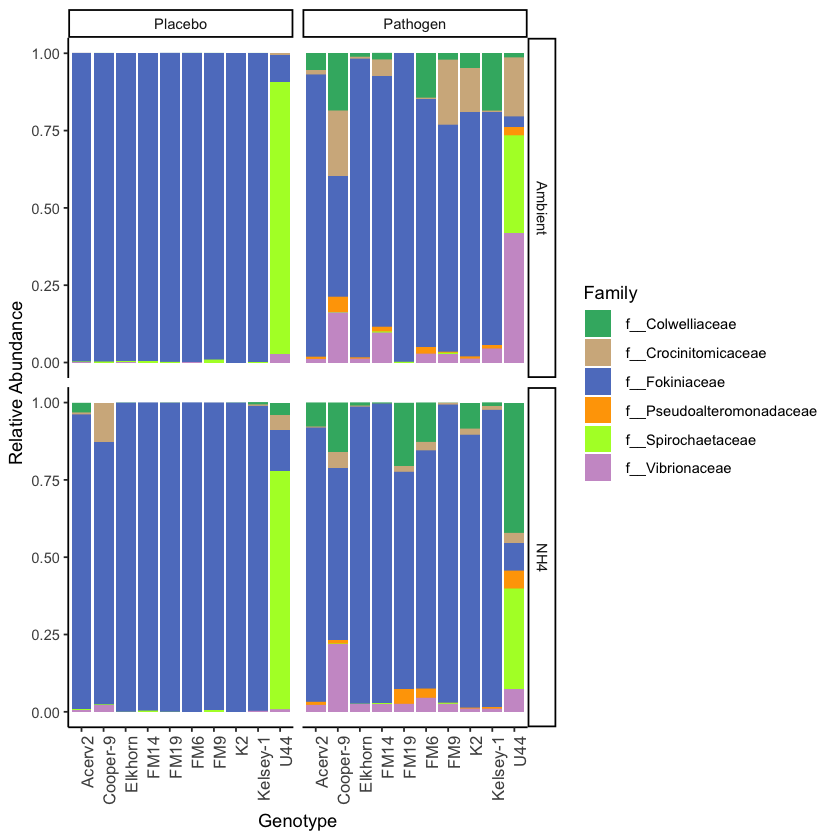

In [277]:
psr_fill_melt$Diseased <- factor(psr_fill_melt$Diseased, 
    levels = c("Placebo", "Pathogen"))


psr_fill_melt %>%
#filter(Order!="Rickettsiales") %>%
#filter(Abundance >= 0.0001) %>%
ggplot(
       aes(x=Genotype, y= Abundance, fill=Family)) + 
theme_bw() +
geom_bar(stat = "identity",position="fill") +
facet_grid(Nutrients~Diseased, scales = "free_x") +
scale_fill_manual(values=c("#3CB371","tan","#5F7FC7", "orange","#ADFF2F", 
                           "#CD9BCD", "gray80", "darkolivegreen4", "#673770","#D14285", 
                           "#8569D5", "#5E738F","#AD6F3B",
                          "lightblue", "salmon","Navy", "#CBD588",
                           "lightblue4", "ivory4", "darkorchid", "palevioletred1",
                           "#DA5724","#CD9BCD","#8fa746","#404b1f","#8FBC8F", 
                            "khaki1","#41636f","#00AEEF","#8bbfd2","brown","#AD6F3B","tan",
                           "#90EE90","#8fa746","lightblue4", "ivory4", "darkorchid", "palevioletred1",
                           "#DA5724","#CD9BCD","#8fa746","#404b1f","#8FBC8F"
                          )) +
#geom_point(aes(size= Abundance), alpha=0.4) +
theme_classic() +

ylab("Relative Abundance") +
xlab("Genotype") +
theme(axis.text.x = element_text(angle = 90, hjust = 1, size=10)) 

ggsave("/Users/stephanie.rosales/Documents/omics_projects/Resitada/figures/Ancom_combo.png",
     width = 7, height = 7, units = "in")

In [267]:
psr_fill_melt_homogenate$Diseased <- factor(psr_fill_melt_homogenate$Diseased, 
    levels = c("Placebo", "Pathogen"))


psr_fill_melt_homogenate %>%
#filter(Order!="Rickettsiales") %>%
#filter(Abundance >= 0.0001) %>%
ggplot(
       aes(x=ID, y= Abundance, fill=Order)) + 
theme_bw() +
geom_bar(stat = "identity",position="fill") +
facet_grid(.~Diseased, scales = "free_x") +
scale_fill_manual(values=c("#3CB371","tan","#5F7FC7", "orange","#ADFF2F", 
                           "#CD9BCD", "gray80", "darkolivegreen4", "#673770","#D14285", 
                           "#8569D5", "#5E738F","#AD6F3B",
                          "lightblue", "salmon","Navy", "#CBD588",
                           "lightblue4", "ivory4", "darkorchid", "palevioletred1",
                           "#DA5724","#CD9BCD","#8fa746","#404b1f","#8FBC8F", 
                            "khaki1","#41636f","#00AEEF","#8bbfd2","brown","#AD6F3B","tan",
                           "#90EE90","#8fa746","lightblue4", "ivory4", "darkorchid", "palevioletred1",
                           "#DA5724","#CD9BCD","#8fa746","#404b1f","#8FBC8F"
                          )) +
#geom_point(aes(size= Abundance), alpha=0.4) +
theme_classic() +

ylab("Relative Abundance") +
xlab("Homogenate") +
theme(axis.text.x = element_text(angle = 90, hjust = 1, size=10)) 

ggsave("/Users/stephanie.rosales/Documents/omics_projects/Resitada/figures/ANCOM_homogenate.png",
     width = 7, height = 7, units = "in")

ERROR: Error in factor(psr_fill_melt_homogenate$Diseased, levels = c("Placebo", : object 'psr_fill_melt_homogenate' not found


,taxon_id,HealthDL,NutrientsNH4,GenotypeCooper-9,GenotypeElkhorn,GenotypeFM14,GenotypeFM19,GenotypeFM6,GenotypeFM9,GenotypeK2,GenotypeKelsey-1,GenotypeU44
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,ad3a3e7c08784d4bcc776c811681ec93,0,0,0,0,0,0,0,0,0,0,0
2,1d6420bfd9e1bec0e99d5c7764504717,0,0,0,0,0,0,0,0,0,0,0
3,87ee6bb9f7b69f2b6c5f95c01db5e924,0,0,0,0,0,0,0,0,0,0,0
4,d655ef1a20f564352a54c08fc716e0f1,0,0,0,0,0,0,0,0,0,0,0
5,bab5d395338dc622ef84862d52ad7108,0,0,0,0,0,0,0,0,0,0,0
6,09076d07bd26f0e323724b55aecd1f3d,0,0,0,0,0,0,0,0,0,0,0


[1] 157  12

,taxon_id,HealthDLSD,NutrientsNH4SD,GenotypeCooper-9SD,GenotypeElkhornSD,GenotypeFM14SD,GenotypeFM19SD,GenotypeFM6SD,GenotypeFM9SD,GenotypeK2SD,GenotypeKelsey-1SD,GenotypeU44SD
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,ad3a3e7c08784d4bcc776c811681ec93,0,0,0,0,0,0,0,0,0,0,0
2,1d6420bfd9e1bec0e99d5c7764504717,0,0,0,0,0,0,0,0,0,0,0
3,87ee6bb9f7b69f2b6c5f95c01db5e924,0,0,0,0,0,0,0,0,0,0,0
4,d655ef1a20f564352a54c08fc716e0f1,0,0,0,0,0,0,0,0,0,0,0
5,bab5d395338dc622ef84862d52ad7108,0,0,0,0,0,0,0,0,0,0,0
6,09076d07bd26f0e323724b55aecd1f3d,0,0,0,0,0,0,0,0,0,0,0


taxon_id,Sig
<chr>,<lgl>


Joining, by = "taxon_id"



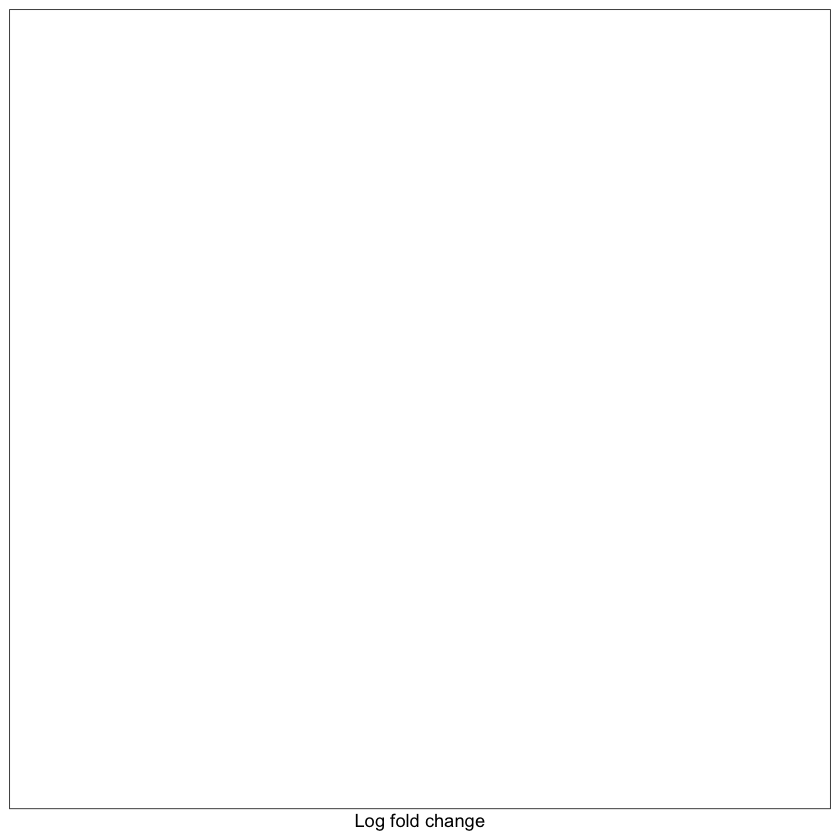

In [90]:
df_fig1 = data.frame(res$beta * res$diff_abn, check.names = FALSE) %>% 
  rownames_to_column("taxon_id")

head(df_fig1)

dim(df_fig1)

df_fig2 = data.frame(res$se * res$diff_abn, check.names = FALSE) %>% 
  rownames_to_column("taxon_id")
colnames(df_fig2)[-1] = paste0(colnames(df_fig2)[-1], "SD")
head(df_fig2)


df_fig = df_fig1 %>% left_join(df_fig2, by = "taxon_id") %>%
  transmute(taxon_id, NutrientsNH4, NutrientsNH4SD)%>%
  mutate(group = ifelse(NutrientsNH4 > 0, "NH4", "Ambient"))
df_fig$taxon_id = factor(df_fig$taxon_id, levels = df_fig$taxon_id)


sigs=res$diff_abn %>% as.data.frame() %>%
select(NutrientsNH4)  %>%
filter(NutrientsNH4=="TRUE") %>%
rownames_to_column("taxon_id") %>%
rename(Sig=NutrientsNH4)
head(sigs)


df_fig =df_fig %>% inner_join(sigs)




ggplot(data = df_fig, 
           aes(x = NutrientsNH4, y = taxon_id, fill = group, color = group)) + 
  geom_bar(stat = "identity", width = 0.7, 
           position = position_dodge(width = 0.4)) +
  geom_errorbar(aes(xmin = NutrientsNH4 - NutrientsNH4SD, xmax =NutrientsNH4 + NutrientsNH4SD),
                width = 0.2,
                position = position_dodge(0.05), color = "black") + 
  labs(y = NULL, x = "Log fold change") + 
  theme_bw() + 
  theme(legend.position = "none",
        panel.grid.minor.x = element_blank()) +
theme(axis.text.y = element_text(size = 5))

In [99]:
out = ancombc(phyloseq = ps_fill_razor, formula = "Nutrients + Genotype", 
              p_adj_method = "BH", zero_cut = 0.90, lib_cut = 1000, 
              group = "Nutrients", struc_zero = TRUE, neg_lb = TRUE, tol = 1e-5, 
              max_iter = 100, conserve = TRUE, alpha = 0.05, global = FALSE)

res = out$res
res_global = out$res_global

Warning message in data_prep(phyloseq, group, zero_cut, lib_cut, global = global):
“The multi-group comparison will be deactivated as the group variable has < 3 categories.”


,taxon_id,NutrientsNH4,GenotypeCooper-9,GenotypeElkhorn,GenotypeFM14,GenotypeFM19,GenotypeFM6,GenotypeFM9,GenotypeK2,GenotypeKelsey-1,GenotypeU44
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,ad3a3e7c08784d4bcc776c811681ec93,0.0000000,0,0,0,0,0,0,0,0,0
2,1d6420bfd9e1bec0e99d5c7764504717,0.0000000,0,0,0,0,0,0,0,0,0
3,87ee6bb9f7b69f2b6c5f95c01db5e924,0.0000000,0,0,0,0,0,0,0,0,0
4,2d6f7455e9e2d0486c87f547abeaf1e8,-0.7284246,0,0,0,0,0,0,0,0,0
5,bab5d395338dc622ef84862d52ad7108,-0.5458162,0,0,0,0,0,0,0,0,0
6,15da1483a1fa23ee78ee6cc1439a85a7,0.4906197,0,0,0,0,0,0,0,0,0


[1] 69 11

,taxon_id,NutrientsNH4SD,GenotypeCooper-9SD,GenotypeElkhornSD,GenotypeFM14SD,GenotypeFM19SD,GenotypeFM6SD,GenotypeFM9SD,GenotypeK2SD,GenotypeKelsey-1SD,GenotypeU44SD
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,ad3a3e7c08784d4bcc776c811681ec93,0.0000000,0,0,0,0,0,0,0,0,0
2,1d6420bfd9e1bec0e99d5c7764504717,0.0000000,0,0,0,0,0,0,0,0,0
3,87ee6bb9f7b69f2b6c5f95c01db5e924,0.0000000,0,0,0,0,0,0,0,0,0
4,2d6f7455e9e2d0486c87f547abeaf1e8,0.3769512,0,0,0,0,0,0,0,0,0
5,bab5d395338dc622ef84862d52ad7108,0.4308902,0,0,0,0,0,0,0,0,0
6,15da1483a1fa23ee78ee6cc1439a85a7,0.3979740,0,0,0,0,0,0,0,0,0


,taxon_id,Sig
,<chr>,<lgl>
1,2d6f7455e9e2d0486c87f547abeaf1e8,TRUE
2,bab5d395338dc622ef84862d52ad7108,TRUE
3,15da1483a1fa23ee78ee6cc1439a85a7,TRUE
4,b4bbe0807baee227746e8f51d9b58556,TRUE
5,96b452fd3bd63b0c70b038a1979a67fd,TRUE
6,b85cbd037c35613d493f52be391625ec,TRUE


Joining, by = "taxon_id"



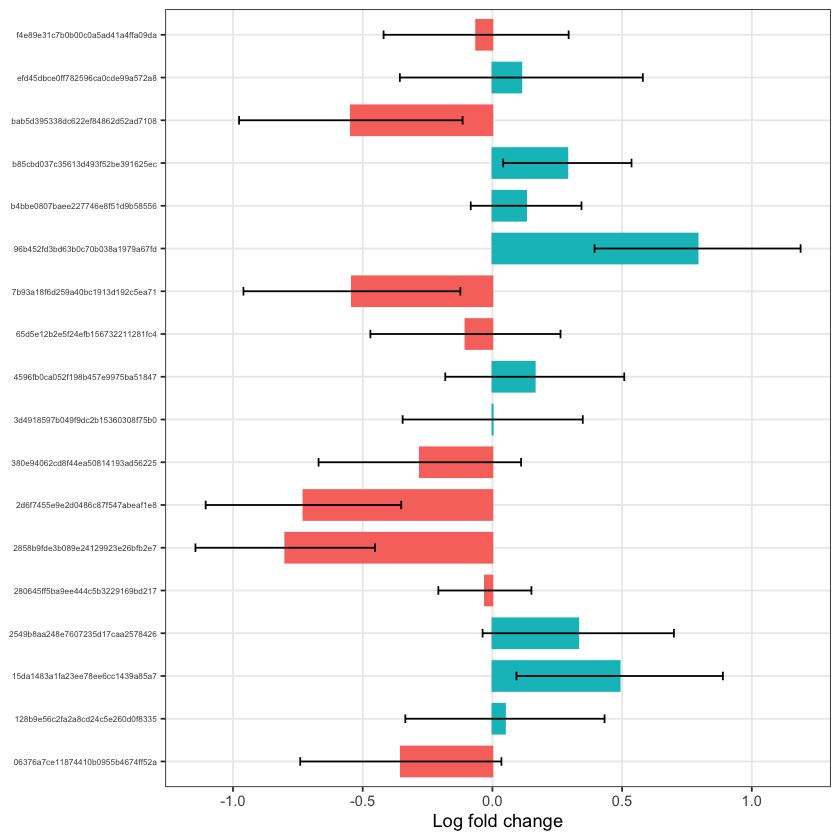

In [101]:
df_fig1 = data.frame(res$beta * res$diff_abn, check.names = FALSE) %>% 
  rownames_to_column("taxon_id")

head(df_fig1)

dim(df_fig1)

df_fig2 = data.frame(res$se * res$diff_abn, check.names = FALSE) %>% 
  rownames_to_column("taxon_id")
colnames(df_fig2)[-1] = paste0(colnames(df_fig2)[-1], "SD")
head(df_fig2)


df_fig = df_fig1 %>% left_join(df_fig2, by = "taxon_id") %>%
  transmute(taxon_id, NutrientsNH4, NutrientsNH4SD)%>%
  mutate(group = ifelse(NutrientsNH4 > 0, "NH4", "Ambient"))
df_fig$taxon_id = factor(df_fig$taxon_id, levels = df_fig$taxon_id)


sigs=res$diff_abn %>% as.data.frame() %>%
select(NutrientsNH4)  %>%
filter(NutrientsNH4=="TRUE") %>%
rownames_to_column("taxon_id") %>%
rename(Sig=NutrientsNH4)
head(sigs)


df_fig =df_fig %>% inner_join(sigs)




ggplot(data = df_fig, 
           aes(x = NutrientsNH4, y = taxon_id, fill = group, color = group)) + 
  geom_bar(stat = "identity", width = 0.7, 
           position = position_dodge(width = 0.4)) +
  geom_errorbar(aes(xmin = NutrientsNH4 - NutrientsNH4SD, xmax =NutrientsNH4 + NutrientsNH4SD),
                width = 0.2,
                position = position_dodge(0.05), color = "black") + 
  labs(y = NULL, x = "Log fold change") + 
  theme_bw() + 
  theme(legend.position = "none",
        panel.grid.minor.x = element_blank()) +
theme(axis.text.y = element_text(size = 5))

In [62]:
res_ancom= df_fig %>%
mutate(Feature.ID = taxon_id) %>%
#rownames_to_column("taxon")
left_join(as.data.frame(taxa_16S), "Feature.ID") %>%
#select(taxon_id, Class, Order, Family, Genus, Taxon) %>%
column_to_rownames("taxon_id")%>%
as.matrix

In [63]:
ps2=phyloseq(otu_table(ASVs, taxa_are_rows=TRUE), 
               sample_data(meta),
              tax_table(res_ancom))
ps2=subset_samples(ps2, !ID %in% c("N169_256_R2", "N157_265_R2", "N165_296_R2", "N161_A067_R2", "N185_A088_R2",
                                 "N164_A089_R2","N119_A107","N267_A110","N7_A114", "N156_A115","N158_A116",
                                 "N101_A118","N160_A119","N277_A125"))
ps2= subset_samples(ps2, Genotype!="U41")
ps2

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 120 taxa and 257 samples ]
sample_data() Sample Data:       [ 257 samples by 40 sample variables ]
tax_table()   Taxonomy Table:    [ 120 taxa by 13 taxonomic ranks ]

In [104]:
ps2_paired = subset_samples(ps2, Type=="Razor")
ps2_paired

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 18 taxa and 60 samples ]
sample_data() Sample Data:       [ 60 samples by 37 sample variables ]
tax_table()   Taxonomy Table:    [ 18 taxa by 13 taxonomic ranks ]

In [120]:
psr_fill_melt = ps2_paired  %>%  
  #tax_glom("Genus") %>% 
  transform_sample_counts(function(x) {x/sum(x)} ) %>% # Transform to rel. abundance
  psmelt()     

In [121]:
psr_fill_melt

,OTU,Sample,Abundance,sample_names,feature.counts,Initial_sample_ID,Tag,Date_Collected,Replicate,Genotype,⋯,Sig,Feature.ID,Kingdom,Phylum,Class,Order,Family,Genus,Species,ASV
,<chr>,<chr>,<dbl>,<chr>,<int>,<int>,<chr>,<chr>,<chr>,<chr>,⋯,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
94,128b9e56c2fa2a8cd24c5e260d0f8335,N23-A166,1.0000000,N23-A166,16954,23,A166,30-Oct-20,NA,K2,⋯,TRUE,128b9e56c2fa2a8cd24c5e260d0f8335,d__Bacteria,p__Myxococcota,c__Myxococcia,o__Myxococcales,f__Myxococcaceae,g__P3OB-42,s__uncultured_bacterium,751
121,15da1483a1fa23ee78ee6cc1439a85a7,N43-A189,1.0000000,N43-A189,29656,43,A189,30-Oct-20,NA,FM19,⋯,TRUE,15da1483a1fa23ee78ee6cc1439a85a7,d__Bacteria,NA,NA,NA,NA,NA,NA,895
204,2549b8aa248e7607235d17caa2578426,N37-285,1.0000000,N37-285,29478,37,285,30-Oct-20,NA,FM14,⋯,TRUE,2549b8aa248e7607235d17caa2578426,d__Bacteria,p__Proteobacteria,c__Alphaproteobacteria,o__Rhodobacterales,f__Rhodobacteraceae,NA,NA,1483
385,2d6f7455e9e2d0486c87f547abeaf1e8,N54-A178,1.0000000,N54-A178,36851,54,A178,30-Oct-20,NA,FM19,⋯,TRUE,2d6f7455e9e2d0486c87f547abeaf1e8,d__Bacteria,NA,NA,NA,NA,NA,NA,1818
571,4596fb0ca052f198b457e9975ba51847,N73-A155,1.0000000,N73-A155,40260,73,A155,30-Oct-20,NA,K2,⋯,TRUE,4596fb0ca052f198b457e9975ba51847,d__Bacteria,NA,NA,NA,NA,NA,NA,2810
638,65d5e12b2e5f24efb156732211281fc4,N57-263,1.0000000,N57-263,32111,57,263,30-Oct-20,NA,FM14,⋯,TRUE,65d5e12b2e5f24efb156732211281fc4,d__Bacteria,p__Campilobacterota,c__Campylobacteria,o__Campylobacterales,f__Helicobacteraceae,g__uncultured,s__uncultured_bacterium,4074
680,7b93a18f6d259a40bc1913d192c5ea71,N21-A095,1.0000000,N21-A095,31271,21,A095,30-Oct-20,NA,Kelsey-1,⋯,TRUE,7b93a18f6d259a40bc1913d192c5ea71,d__Bacteria,p__Proteobacteria,c__Alphaproteobacteria,o__Rickettsiales,f__Fokiniaceae,g__MD3-55,NA,4954
682,7b93a18f6d259a40bc1913d192c5ea71,N48-A013,1.0000000,N48-A013,20583,48,A013,30-Oct-20,NA,Kelsey-1,⋯,TRUE,7b93a18f6d259a40bc1913d192c5ea71,d__Bacteria,p__Proteobacteria,c__Alphaproteobacteria,o__Rickettsiales,f__Fokiniaceae,g__MD3-55,NA,4954
710,7b93a18f6d259a40bc1913d192c5ea71,N63-A159,1.0000000,N63-A159,31755,63,A159,30-Oct-20,NA,K2,⋯,TRUE,7b93a18f6d259a40bc1913d192c5ea71,d__Bacteria,p__Proteobacteria,c__Alphaproteobacteria,o__Rickettsiales,f__Fokiniaceae,g__MD3-55,NA,4954


Warning message:
“Removed 198 rows containing missing values (position_stack).”


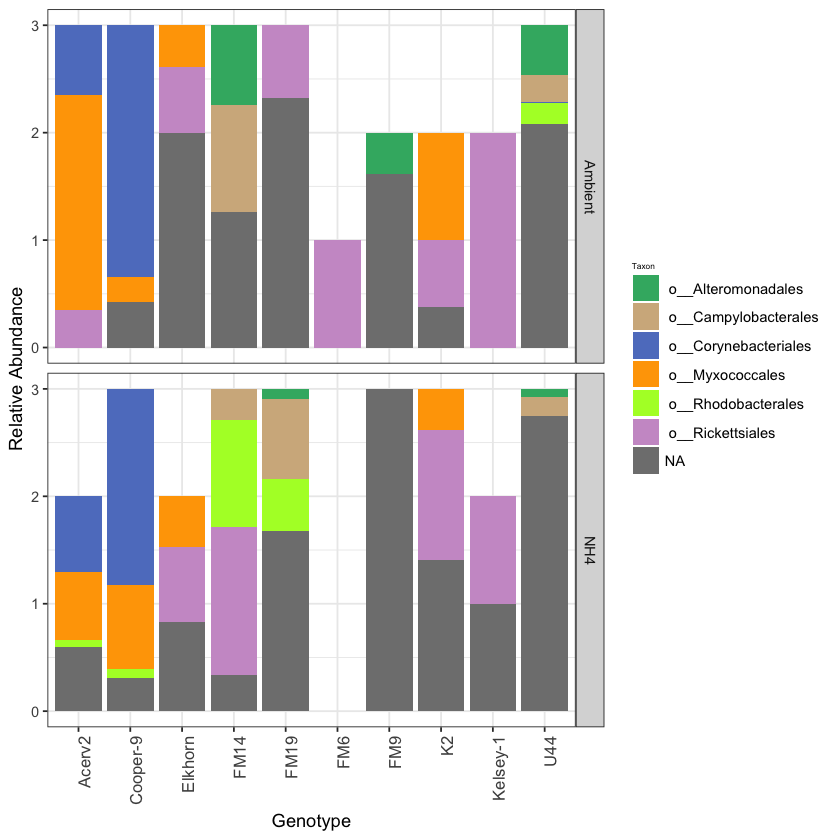

In [124]:
psr_fill_melt %>%
#filter(Order!="Rickettsiales") %>%
#filter(Abundance >= 0.0001) %>%
ggplot(
       aes(x=Genotype, y= Abundance, fill=Order)) + 
theme_bw() +
geom_bar(stat = "identity",position="stack") +
facet_grid(Nutrients~., scales = "free_x") +
scale_fill_manual(values=c("#3CB371","tan","#5F7FC7", "orange","#ADFF2F", 
                           "#CD9BCD", "gray80", "darkolivegreen4", "#673770","#D14285", 
                           "#8569D5", "#5E738F","#AD6F3B",
                          "lightblue", "salmon","Navy", "#CBD588",
                           "lightblue4", "ivory4", "darkorchid", "palevioletred1",
                           "#DA5724","#CD9BCD","#8fa746","#404b1f","#8FBC8F", 
                            "khaki1","#41636f","#00AEEF","#8bbfd2","brown","#AD6F3B","tan",
                           "#90EE90","#8fa746","lightblue4", "ivory4", "darkorchid", "palevioletred1",
                           "#DA5724","#CD9BCD","#8fa746","#404b1f","#8FBC8F"
                          )) +
#geom_point(aes(size= Abundance), alpha=0.4) +
theme_bw() +
theme(legend.title = element_text(size=5)) +
labs(fill='Taxon')  +
ylab("Relative Abundance") +
xlab("Genotype") +
theme(axis.text.x = element_text(angle = 90, hjust = 1, size=10)) 

In [251]:
sample_data(ps_fill_Am_Pl)$Disease_Susceptibility

[1] "Susceptible" "Susceptible" "Susceptible" "Susceptible" "Susceptible"
 [6] "Susceptible" "Susceptible" "Susceptible" "Susceptible" "Susceptible"
[11] "Susceptible" "Susceptible" "Susceptible" "Susceptible" "Susceptible"
[16] "Susceptible" "Susceptible" "Susceptible" "Susceptible" "Susceptible"
[21] "Susceptible" "Susceptible" "Susceptible" "Susceptible" "Susceptible"
[26] "Susceptible" "Susceptible" "Susceptible" "Susceptible" "Susceptible"
[31] "Susceptible" "Susceptible" "Susceptible" "Susceptible"

In [249]:
out = ancombc(phyloseq = ps_fill_Am_Pl, formula = "Disease_Susceptibility", 
              p_adj_method = "holm", zero_cut = 0.90, lib_cut = 1000, 
              group = "Disease_Susceptibility", struc_zero = TRUE, neg_lb = TRUE, tol = 1e-5, 
              max_iter = 100, conserve = TRUE, alpha = 0.05, global = FALSE)

res = out$res
res_global = out$res_global



df_fig1 = data.frame(res$beta * res$diff_abn, check.names = FALSE) %>% 
  rownames_to_column("taxon_id")

head(df_fig1)

dim(df_fig1)

df_fig2 = data.frame(res$se * res$diff_abn, check.names = FALSE) %>% 
  rownames_to_column("taxon_id")
colnames(df_fig2)[-1] = paste0(colnames(df_fig2)[-1], "SD")
head(df_fig2)


df_fig = df_fig1 %>% left_join(df_fig2, by = "taxon_id") %>%
  transmute(taxon_id, Disease_SusceptibilitySusceptible, Disease_SusceptibilitySusceptibleSD)%>%
  mutate(group = ifelse(Disease_SusceptibilitySusceptible > 0, "Resistant", "Susceptible"))
df_fig$taxon_id = factor(df_fig$taxon_id, levels = df_fig$taxon_id)


sigs=res$diff_abn %>% as.data.frame() %>%
select(Disease_SusceptibilitySusceptible)  %>%
filter(Disease_SusceptibilitySusceptible=="TRUE") %>%
rownames_to_column("taxon_id") %>%
rename(Sig=Disease_SusceptibilitySusceptible)
head(sigs)


df_fig =df_fig %>% inner_join(sigs)


res_ancom= df_fig %>%
mutate(Feature.ID = taxon_id) %>%
#rownames_to_column("taxon")
left_join(as.data.frame(taxa_16S), "Feature.ID") %>%
#select(taxon_id, Class, Order, Family, Genus, Taxon) %>%
column_to_rownames("taxon_id")%>%
as.matrix


ERROR: Error in data_prep(phyloseq, group, zero_cut, lib_cut, global = global): The group variable should have >= 2 categories.


In [235]:
ps2=phyloseq(otu_table(ASVs, taxa_are_rows=TRUE), 
               sample_data(meta),
              tax_table(res_ancom))
ps2=subset_samples(ps2, !ID %in% c("N169_256_R2", "N157_265_R2", "N165_296_R2", "N161_A067_R2", "N185_A088_R2",
                                 "N164_A089_R2","N119_A107","N267_A110","N7_A114", "N156_A115","N158_A116",
                                 "N101_A118","N160_A119","N277_A125"))
ps2= subset_samples(ps2, Genotype!="U41")
ps2


ps_ancom_APa = subset_samples(ps2,
                     Combo=="Ambient_Pathogen"& Type== "Clipped")
ps_ancom_APa


psr_fill_melt = ps_ancom_APa  %>%  
  #tax_glom("Genus") %>% 
  transform_sample_counts(function(x) {x/sum(x)} ) %>% # Transform to rel. abundance
  psmelt()    

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 145 taxa and 257 samples ]
sample_data() Sample Data:       [ 257 samples by 40 sample variables ]
tax_table()   Taxonomy Table:    [ 145 taxa by 13 taxonomic ranks ]

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 145 taxa and 30 samples ]
sample_data() Sample Data:       [ 30 samples by 40 sample variables ]
tax_table()   Taxonomy Table:    [ 145 taxa by 13 taxonomic ranks ]

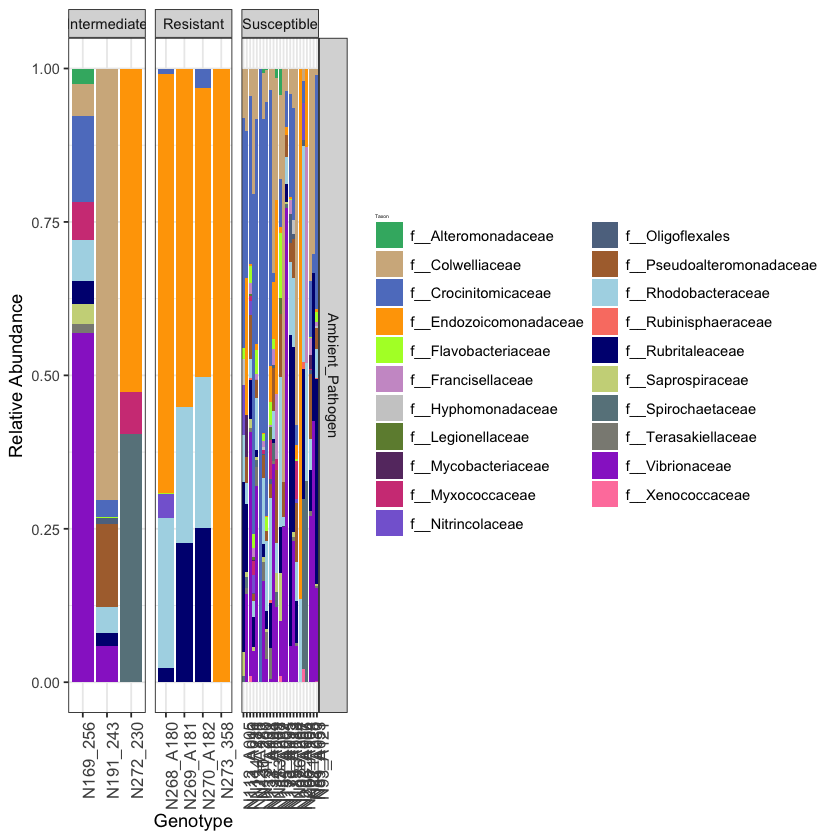

In [239]:
psr_fill_melt %>%
filter(Genus!=" g__MD3-55") %>%
#filter(Abundance >= 0.0001) %>%
ggplot(
       aes(x=ID, y= Abundance, fill=Family)) + 
theme_bw() +
geom_bar(stat = "identity",position="fill") +
facet_grid(Combo~Survivorship, scales = "free_x") +
scale_fill_manual(values=c("#3CB371","tan","#5F7FC7", "orange","#ADFF2F", 
                           "#CD9BCD", "gray80", "darkolivegreen4", "#673770","#D14285", 
                           "#8569D5", "#5E738F","#AD6F3B",
                          "lightblue", "salmon","Navy", "#CBD588",
                           "lightblue4", "ivory4", "darkorchid", "palevioletred1",
                           "#DA5724","#CD9BCD","#8fa746","#404b1f","#8FBC8F", 
                            "khaki1","#41636f","#00AEEF","#8bbfd2","brown","#AD6F3B","tan",
                           "#90EE90","#8fa746","lightblue4", "ivory4", "darkorchid", "palevioletred1",
                           "#DA5724","#CD9BCD","#8fa746","#404b1f","#8FBC8F",
                           "#3CB371","tan","#5F7FC7", "orange","#ADFF2F", 
                           "#CD9BCD", "gray80", "darkolivegreen4", "#673770","#D14285", 
                           "#8569D5", "#5E738F","#AD6F3B",
                          "lightblue", "salmon","Navy", "#CBD588",
                           "lightblue4", "ivory4", "darkorchid", "palevioletred1",
                           "#DA5724","#CD9BCD","#8fa746","#404b1f","#8FBC8F", 
                            "khaki1","#41636f","#00AEEF","#8bbfd2","brown","#AD6F3B","tan",
                           "#90EE90","#8fa746","lightblue4", "ivory4", "darkorchid", "palevioletred1",
                           "#DA5724","#CD9BCD","#8fa746","#404b1f","#8FBC8F"
                          )) +
#geom_point(aes(size= Abundance), alpha=0.4) +
theme_bw() +
theme(legend.title = element_text(size=3)) +
labs(fill='Taxon')  +
ylab("Relative Abundance") +
xlab("Genotype") +
theme(axis.text.x = element_text(angle = 90, hjust = 1, size=10)) 

In [222]:
out = ancombc(phyloseq = ps_fill_NH_Pl, formula = "NH4_Susceptibility", 
              p_adj_method = "holm", zero_cut = 0.90, lib_cut = 1000, 
              group = "NH4_Susceptibility", struc_zero = TRUE, neg_lb = TRUE, tol = 1e-5, 
              max_iter = 100, conserve = TRUE, alpha = 0.05, global = TRUE)

res = out$res
res_global = out$res_global



df_fig1 = data.frame(res$beta * res$diff_abn, check.names = FALSE) %>% 
  rownames_to_column("taxon_id")

head(df_fig1)

dim(df_fig1)

df_fig2 = data.frame(res$se * res$diff_abn, check.names = FALSE) %>% 
  rownames_to_column("taxon_id")
colnames(df_fig2)[-1] = paste0(colnames(df_fig2)[-1], "SD")
head(df_fig2)


df_fig = df_fig1 %>% left_join(df_fig2, by = "taxon_id") %>%
  transmute(taxon_id, NH4_SusceptibilitySusceptible, NH4_SusceptibilitySusceptibleSD)%>%
  mutate(group = ifelse(NH4_SusceptibilitySusceptible > 0, "Intermediate", "Susceptible"))
df_fig$taxon_id = factor(df_fig$taxon_id, levels = df_fig$taxon_id)


sigs=res$diff_abn %>% as.data.frame() %>%
select(NH4_SusceptibilitySusceptible)  %>%
filter(NH4_SusceptibilitySusceptible=="TRUE") %>%
rownames_to_column("taxon_id") %>%
rename(Sig=NH4_SusceptibilitySusceptible)
head(sigs)


df_fig =df_fig %>% inner_join(sigs)


res_ancom= df_fig %>%
mutate(Feature.ID = taxon_id) %>%
#rownames_to_column("taxon")
left_join(as.data.frame(taxa_16S), "Feature.ID") %>%
#select(taxon_id, Class, Order, Family, Genus, Taxon) %>%
column_to_rownames("taxon_id")%>%
as.matrix


,taxon_id,NH4_SusceptibilitySusceptible
,<chr>,<dbl>
1,ad3a3e7c08784d4bcc776c811681ec93,-0.9201967
2,1d6420bfd9e1bec0e99d5c7764504717,-1.3949364
3,9b9b0edfeba1ef3150a96dda7385c072,0.0000000
4,a24e19ec3a1891f7fee6cfa389fc09bd,0.0000000
5,babdf7a7daae9f26a7b3c530e5fe2b4f,0.0000000
6,fea4638d48e009fdfdec27a381a41b41,0.0000000


[1] 91  2

,taxon_id,NH4_SusceptibilitySusceptibleSD
,<chr>,<dbl>
1,ad3a3e7c08784d4bcc776c811681ec93,0.5930522
2,1d6420bfd9e1bec0e99d5c7764504717,0.4175188
3,9b9b0edfeba1ef3150a96dda7385c072,0.0000000
4,a24e19ec3a1891f7fee6cfa389fc09bd,0.0000000
5,babdf7a7daae9f26a7b3c530e5fe2b4f,0.0000000
6,fea4638d48e009fdfdec27a381a41b41,0.0000000


,taxon_id,Sig
,<chr>,<lgl>
1,ad3a3e7c08784d4bcc776c811681ec93,TRUE
2,1d6420bfd9e1bec0e99d5c7764504717,TRUE
3,684767b38555b3edd17179e3dc5c99ec,TRUE
4,96b452fd3bd63b0c70b038a1979a67fd,TRUE
5,7ebccf4893caf52fc2052ea0c1647a64,TRUE
6,0e1b13a9e4a25da99c568074e910a19d,TRUE


Joining, by = "taxon_id"



In [223]:
ps2=phyloseq(otu_table(ASVs, taxa_are_rows=TRUE), 
               sample_data(meta),
              tax_table(res_ancom))
ps2=subset_samples(ps2, !ID %in% c("N169_256_R2", "N157_265_R2", "N165_296_R2", "N161_A067_R2", "N185_A088_R2",
                                 "N164_A089_R2","N119_A107","N267_A110","N7_A114", "N156_A115","N158_A116",
                                 "N101_A118","N160_A119","N277_A125"))
ps2= subset_samples(ps2, Genotype!="U41")
ps2


ps_ancom_NPl = subset_samples(ps2,
                     Combo=="NH4_Placebo"& Type== "Clipped")
ps_ancom_NPl


psr_fill_melt = ps_ancom_NPl  %>%  
  #tax_glom("Genus") %>% 
  transform_sample_counts(function(x) {x/sum(x)} ) %>% # Transform to rel. abundance
  psmelt()    

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 51 taxa and 257 samples ]
sample_data() Sample Data:       [ 257 samples by 40 sample variables ]
tax_table()   Taxonomy Table:    [ 51 taxa by 13 taxonomic ranks ]

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 51 taxa and 64 samples ]
sample_data() Sample Data:       [ 64 samples by 40 sample variables ]
tax_table()   Taxonomy Table:    [ 51 taxa by 13 taxonomic ranks ]

Warning message:
“Removed 30 rows containing missing values (position_stack).”


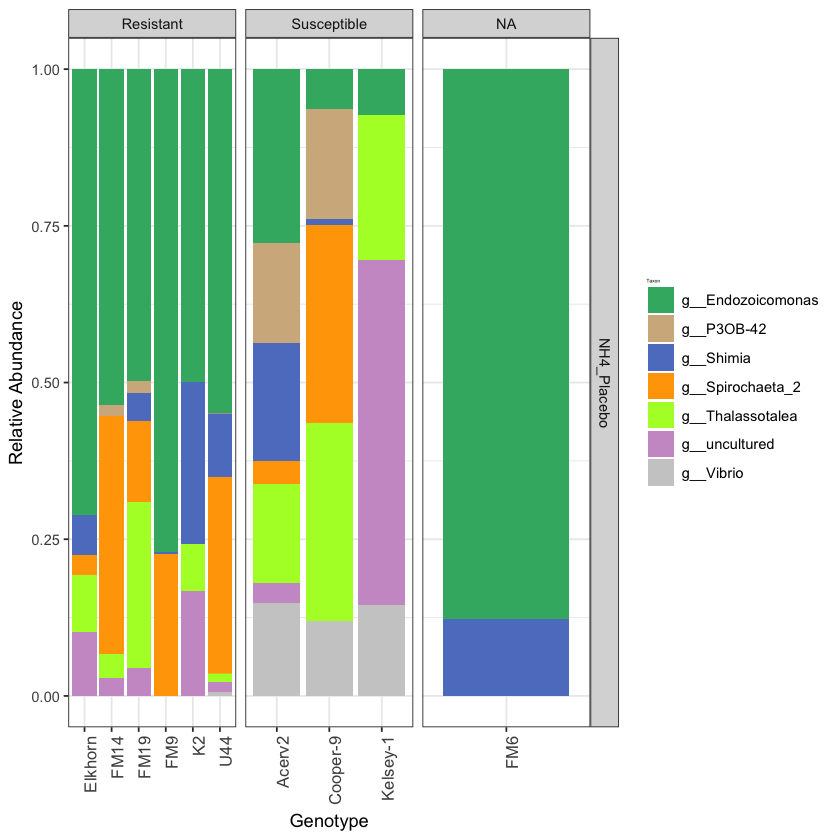

In [224]:
psr_fill_melt %>%
filter(Genus!=" g__MD3-55") %>%
#filter(Abundance >= 0.0001) %>%
ggplot(
       aes(x=Genotype, y= Abundance, fill=Genus)) + 
theme_bw() +
geom_bar(stat = "identity",position="fill") +
facet_grid(Combo~Survivorship, scales = "free_x") +
scale_fill_manual(values=c("#3CB371","tan","#5F7FC7", "orange","#ADFF2F", 
                           "#CD9BCD", "gray80", "darkolivegreen4", "#673770","#D14285", 
                           "#8569D5", "#5E738F","#AD6F3B",
                          "lightblue", "salmon","Navy", "#CBD588",
                           "lightblue4", "ivory4", "darkorchid", "palevioletred1",
                           "#DA5724","#CD9BCD","#8fa746","#404b1f","#8FBC8F", 
                            "khaki1","#41636f","#00AEEF","#8bbfd2","brown","#AD6F3B","tan",
                           "#90EE90","#8fa746","lightblue4", "ivory4", "darkorchid", "palevioletred1",
                           "#DA5724","#CD9BCD","#8fa746","#404b1f","#8FBC8F",
                           "#3CB371","tan","#5F7FC7", "orange","#ADFF2F", 
                           "#CD9BCD", "gray80", "darkolivegreen4", "#673770","#D14285", 
                           "#8569D5", "#5E738F","#AD6F3B",
                          "lightblue", "salmon","Navy", "#CBD588",
                           "lightblue4", "ivory4", "darkorchid", "palevioletred1",
                           "#DA5724","#CD9BCD","#8fa746","#404b1f","#8FBC8F", 
                            "khaki1","#41636f","#00AEEF","#8bbfd2","brown","#AD6F3B","tan",
                           "#90EE90","#8fa746","lightblue4", "ivory4", "darkorchid", "palevioletred1",
                           "#DA5724","#CD9BCD","#8fa746","#404b1f","#8FBC8F"
                          )) +
#geom_point(aes(size= Abundance), alpha=0.4) +
theme_bw() +
theme(legend.title = element_text(size=3)) +
labs(fill='Taxon')  +
ylab("Relative Abundance") +
xlab("Genotype") +
theme(axis.text.x = element_text(angle = 90, hjust = 1, size=10)) 

In [225]:
out = ancombc(phyloseq = ps_fill_NH_Pa, formula = "NH4_Disease_Susceptibility ", 
              p_adj_method = "holm", zero_cut = 0.90, lib_cut = 1000, 
              group = "NH4_Disease_Susceptibility", struc_zero = TRUE, neg_lb = TRUE, tol = 1e-5, 
              max_iter = 100, conserve = TRUE, alpha = 0.05, global = TRUE)

res = out$res
res_global = out$res_global



df_fig1 = data.frame(res$beta * res$diff_abn, check.names = FALSE) %>% 
  rownames_to_column("taxon_id")

head(df_fig1)

dim(df_fig1)

df_fig2 = data.frame(res$se * res$diff_abn, check.names = FALSE) %>% 
  rownames_to_column("taxon_id")
colnames(df_fig2)[-1] = paste0(colnames(df_fig2)[-1], "SD")
head(df_fig2)


df_fig = df_fig1 %>% left_join(df_fig2, by = "taxon_id") %>%
  transmute(taxon_id, NH4_Disease_SusceptibilitySusceptible, NH4_Disease_SusceptibilitySusceptibleSD)%>%
  mutate(group = ifelse(NH4_Disease_SusceptibilitySusceptible > 0, "Susceptible", "Intermediate"))
df_fig$taxon_id = factor(df_fig$taxon_id, levels = df_fig$taxon_id)


sigs=res$diff_abn %>% as.data.frame() %>%
select(NH4_Disease_SusceptibilitySusceptible)  %>%
filter(NH4_Disease_SusceptibilitySusceptible=="TRUE") %>%
rownames_to_column("taxon_id") %>%
rename(Sig=NH4_Disease_SusceptibilitySusceptible)
head(sigs)


df_fig =df_fig %>% inner_join(sigs)


res_ancom= df_fig %>%
mutate(Feature.ID = taxon_id) %>%
#rownames_to_column("taxon")
left_join(as.data.frame(taxa_16S), "Feature.ID") %>%
#select(taxon_id, Class, Order, Family, Genus, Taxon) %>%
column_to_rownames("taxon_id")%>%
as.matrix


Warning message in data_prep(phyloseq, group, zero_cut, lib_cut, global = global):
“The multi-group comparison will be deactivated as the group variable has < 3 categories.”


,taxon_id,NH4_Disease_SusceptibilitySusceptible
,<chr>,<dbl>
1,ad3a3e7c08784d4bcc776c811681ec93,0.00000000
2,1d6420bfd9e1bec0e99d5c7764504717,-0.32199087
3,bab5d395338dc622ef84862d52ad7108,-0.57420128
4,09076d07bd26f0e323724b55aecd1f3d,-0.91347991
5,9b9b0edfeba1ef3150a96dda7385c072,-0.02966586
6,a24e19ec3a1891f7fee6cfa389fc09bd,0.78152168


[1] 158   2

,taxon_id,NH4_Disease_SusceptibilitySusceptibleSD
,<chr>,<dbl>
1,ad3a3e7c08784d4bcc776c811681ec93,0.0000000
2,1d6420bfd9e1bec0e99d5c7764504717,0.5533805
3,bab5d395338dc622ef84862d52ad7108,0.5029072
4,09076d07bd26f0e323724b55aecd1f3d,0.5413227
5,9b9b0edfeba1ef3150a96dda7385c072,0.3999332
6,a24e19ec3a1891f7fee6cfa389fc09bd,0.4584105


,taxon_id,Sig
,<chr>,<lgl>
1,1d6420bfd9e1bec0e99d5c7764504717,TRUE
2,bab5d395338dc622ef84862d52ad7108,TRUE
3,09076d07bd26f0e323724b55aecd1f3d,TRUE
4,9b9b0edfeba1ef3150a96dda7385c072,TRUE
5,a24e19ec3a1891f7fee6cfa389fc09bd,TRUE
6,fea4638d48e009fdfdec27a381a41b41,TRUE


Joining, by = "taxon_id"



In [226]:
ps2=phyloseq(otu_table(ASVs, taxa_are_rows=TRUE), 
               sample_data(meta),
              tax_table(res_ancom))
ps2=subset_samples(ps2, !ID %in% c("N169_256_R2", "N157_265_R2", "N165_296_R2", "N161_A067_R2", "N185_A088_R2",
                                 "N164_A089_R2","N119_A107","N267_A110","N7_A114", "N156_A115","N158_A116",
                                 "N101_A118","N160_A119","N277_A125"))
ps2= subset_samples(ps2, Genotype!="U41")
ps2


ps_ancom_NPa = subset_samples(ps2,
                     Combo=="NH4_Pathogen"& Type== "Clipped")
ps_ancom_NPa


psr_fill_melt = ps_ancom_NPa  %>%  
  #tax_glom("Genus") %>% 
  transform_sample_counts(function(x) {x/sum(x)} ) %>% # Transform to rel. abundance
  psmelt()    

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 96 taxa and 257 samples ]
sample_data() Sample Data:       [ 257 samples by 40 sample variables ]
tax_table()   Taxonomy Table:    [ 96 taxa by 13 taxonomic ranks ]

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 96 taxa and 56 samples ]
sample_data() Sample Data:       [ 56 samples by 40 sample variables ]
tax_table()   Taxonomy Table:    [ 96 taxa by 13 taxonomic ranks ]

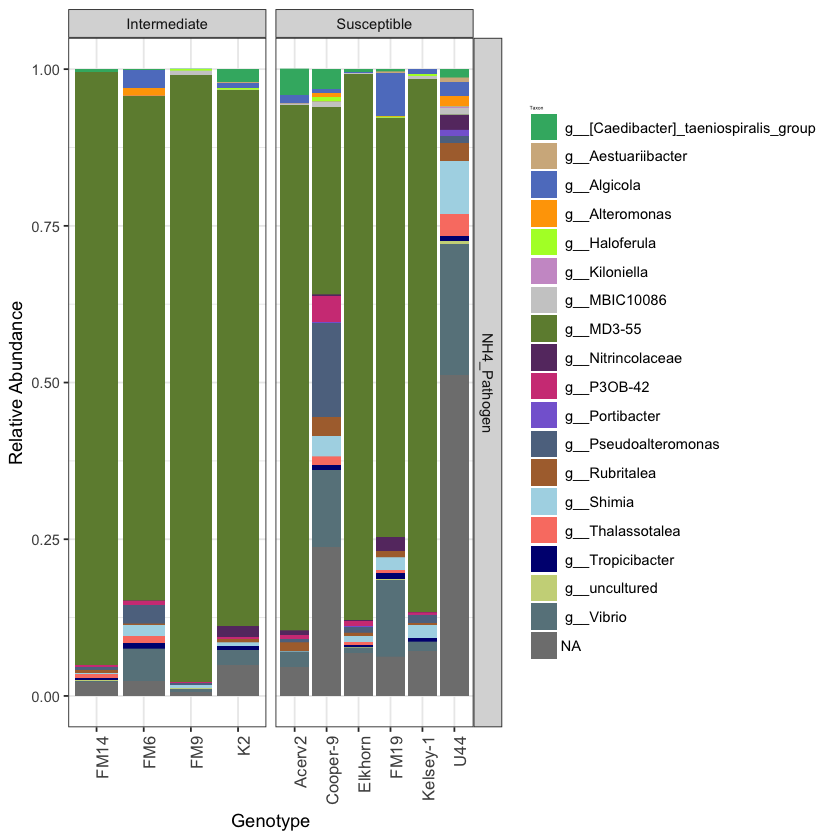

In [229]:
psr_fill_melt %>%
#filter(Genus!=" g__MD3-55") %>%
#filter(Abundance >= 0.0001) %>%
ggplot(
       aes(x=Genotype, y= Abundance, fill=Genus)) + 
theme_bw() +
geom_bar(stat = "identity",position="fill") +
facet_grid(Combo~Survivorship, scales = "free_x") +
scale_fill_manual(values=c("#3CB371","tan","#5F7FC7", "orange","#ADFF2F", 
                           "#CD9BCD", "gray80", "darkolivegreen4", "#673770","#D14285", 
                           "#8569D5", "#5E738F","#AD6F3B",
                          "lightblue", "salmon","Navy", "#CBD588",
                           "lightblue4", "ivory4", "darkorchid", "palevioletred1",
                           "#DA5724","#CD9BCD","#8fa746","#404b1f","#8FBC8F", 
                            "khaki1","#41636f","#00AEEF","#8bbfd2","brown","#AD6F3B","tan",
                           "#90EE90","#8fa746","lightblue4", "ivory4", "darkorchid", "palevioletred1",
                           "#DA5724","#CD9BCD","#8fa746","#404b1f","#8FBC8F",
                           "#3CB371","tan","#5F7FC7", "orange","#ADFF2F", 
                           "#CD9BCD", "gray80", "darkolivegreen4", "#673770","#D14285", 
                           "#8569D5", "#5E738F","#AD6F3B",
                          "lightblue", "salmon","Navy", "#CBD588",
                           "lightblue4", "ivory4", "darkorchid", "palevioletred1",
                           "#DA5724","#CD9BCD","#8fa746","#404b1f","#8FBC8F", 
                            "khaki1","#41636f","#00AEEF","#8bbfd2","brown","#AD6F3B","tan",
                           "#90EE90","#8fa746","lightblue4", "ivory4", "darkorchid", "palevioletred1",
                           "#DA5724","#CD9BCD","#8fa746","#404b1f","#8FBC8F"
                          )) +
#geom_point(aes(size= Abundance), alpha=0.4) +
theme_bw() +
theme(legend.title = element_text(size=3)) +
labs(fill='Taxon')  +
ylab("Relative Abundance") +
xlab("Genotype") +
theme(axis.text.x = element_text(angle = 90, hjust = 1, size=10)) 